In [2]:
import os
from avapi.carla import CarlaScenesManager


cpath = os.path.join("/data/shared/CARLA/multi-agent-v1/")
# cpath = "../examples/sim_results"
CSM = CarlaScenesManager(cpath)
print(CSM.scenes)
CDM = CSM.get_scene_dataset_by_index(0)
print(f"{len(CDM)} frames")

['run-2024-04-03_12:27:10', 'run-2024-04-03_12:28:55', 'run-2024-04-03_12:30:40', 'run-2024-04-03_12:32:23', 'run-2024-04-03_12:34:11', 'run-2024-04-03_12:35:59', 'run-2024-04-03_12:37:50', 'run-2024-04-03_12:39:41', 'run-2024-04-03_12:41:30', 'run-2024-04-03_12:43:19']
1001 frames


Overriding default threshold of 0.7 with 0.5
Loads checkpoint by local backend from path: /home/spencer/Documents/Projects/Research/multi-agent/multi-agent-trust-ue/submodules/lib-avstack-core/third_party/mmdetection/work_dirs/faster_rcnn_r50_fpn_1x_carla_joint/epoch_8.pth


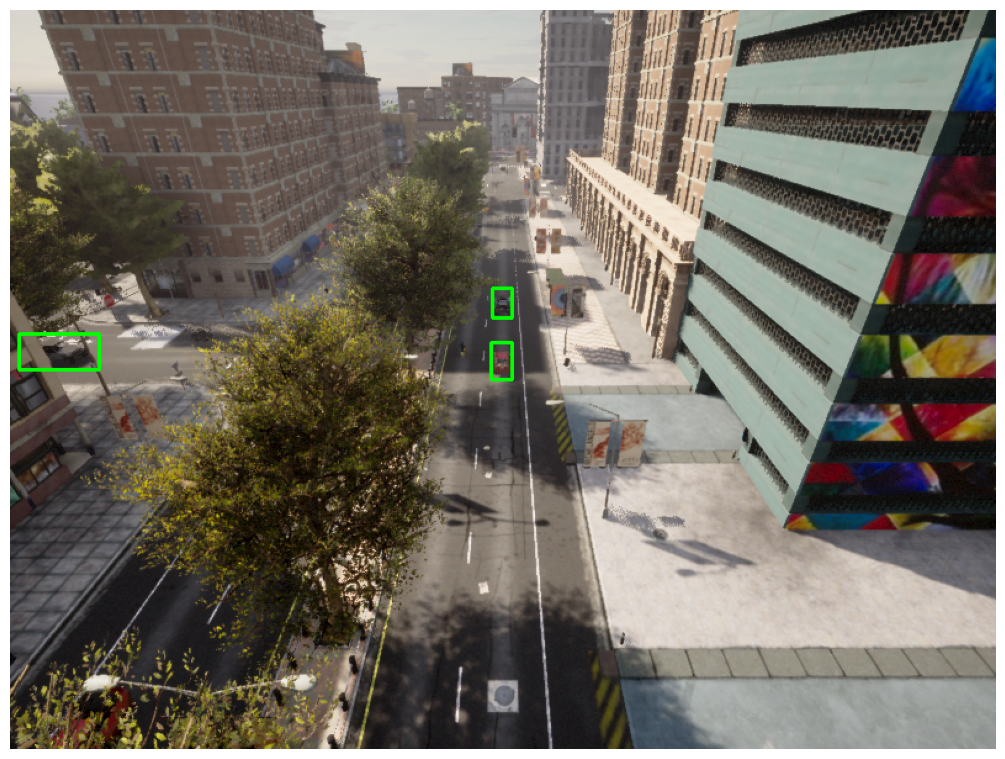

In [6]:
from avstack.modules.perception.object2dfv import MMDetObjectDetector2D
from avapi.visualize.snapshot import show_lidar_bev_with_boxes, show_lidar_on_image, show_image_with_boxes

agent = 6
frame_idx = 5
camera_sensor = "camera-0"
lidar_sensor = "lidar-0"
frame = CDM.get_frames(sensor=camera_sensor, agent=agent)[frame_idx]
img = CDM.get_image(frame=frame, sensor=camera_sensor, agent=agent)
pc = CDM.get_lidar(frame=frame, sensor=lidar_sensor, agent=agent)
objs = CDM.get_objects(frame=frame, sensor=lidar_sensor, agent=agent)

# 2d detector
det_2d = MMDetObjectDetector2D(model="fasterrcnn", dataset="carla-joint", threshold=0.5)
objs_2d = det_2d(img)

# show_lidar_bev_with_boxes(pc=pc, boxes=objs)
# show_lidar_on_image(img=img, pc=pc, boxes=objs)
# show_image_with_boxes(img=img, boxes=objs, inline=True, return_image=False)
show_image_with_boxes(img=img, boxes=objs_2d, inline=True, return_image=False)
